#  **Car price prediction Model**

1. **Introduction**

This report describes the full process used in analyzing a car price dataset using Python. The
dataset, stored in a CSV file on Google Drive, is accessed via Google Colab. The analysis is carried
out using essential libraries like numpy, pandas, seaborn, and matplotlib. Key steps include loading
the dataset, handling missing and duplicate values, visualizing data relationships, and preparing for
machine learning.

We developed a robust predictive model to forecast the future selling prices of cars using a dataset that included key variables such as the car’s manufacturing year, present price, kilometers driven, and the number of previous owners. The model-building process began with extensive data cleaning and preprocessing, which involved handling missing data, removing duplicates, and converting categorical variables like ownership into numerical values. This ensured that the data was ready for machine learning.

Next, we conducted an exploratory data analysis (EDA) to uncover important trends and relationships between the features. Through visualization techniques like boxplots and correlation matrices, we were able to gain insights into how different variables, such as the car’s present price and the number of kilometers driven, affect its selling price. This step also helped identify outliers and ensured a deeper understanding of the data.

After EDA, we moved to feature selection by analyzing the correlation between variables. For example, we found that the car’s present price and the year of manufacture had a strong positive correlation with the selling price, making them crucial predictors. These insights guided us in selecting the most relevant features to improve model accuracy and minimize noise in the dataset.

To build the predictive model, we split the data into training and testing sets to ensure the model was both accurate and generalizable. We trained the model using several machine learning algorithms, including Linear Regression and Decision Tree Regression, which allowed the model to capture the complex relationships between the input features and the target variable—selling price. Through this step, the model learned how the selling price is influenced by factors such as the car’s age, condition, and market value.

Once the model was trained, we used hyperparameter tuning and cross-validation techniques to refine its performance. This step was critical in optimizing parameters like tree depth (for decision trees) and regularization factors (for linear models), which enhanced the model’s predictive power while avoiding overfitting to the training data.

Finally, we evaluated the model’s performance using key metrics like Mean Absolute Error (MAE) and R-squared (R²). These metrics provided a clear picture of how well the model could predict selling prices on unseen data. The results showed that the model was able to make accurate and reliable predictions, with low error margins and a high degree of correlation between the predicted and actual values.

With the model now trained, tested, and validated, it can be used to predict future car selling prices based on new input data. By providing the model with information such as the current market price, kilometers driven, and ownership history, it can generate an estimate of the car’s expected selling price. This predictive capability offers significant value to car dealerships, sellers, and buyers by providing data-driven insights into pricing strategies and market trends. The model can help ensure that sellers set competitive prices and buyers make informed purchasing decisions based on accurate, predictive analytics.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
car=pd.read_csv('/content/drive/MyDrive/car data.csv')

In [ ]:
car.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


Now we will check that is there any missing or NaN values in our data set.

In [ ]:
car.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [ ]:
# Check Duplication
car.duplicated().sum()

2

In [ ]:
# drop duplicate values
car = car.drop_duplicates()
car.duplicated().sum()

0

In [ ]:
car.dtypes

,0
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Driven_kms,int64
Fuel_Type,object
Selling_type,object
Transmission,object
Owner,int64


In [ ]:
# Check the number of unique values of each column
car.nunique()

,0
Car_Name,98
Year,16
Selling_Price,156
Present_Price,148
Driven_kms,206
Fuel_Type,3
Selling_type,2
Transmission,2
Owner,3


In [ ]:
#Check statistics of data set
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


<ipython-input-12-90204512aece>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(car['Selling_Price'],palette='pastel')


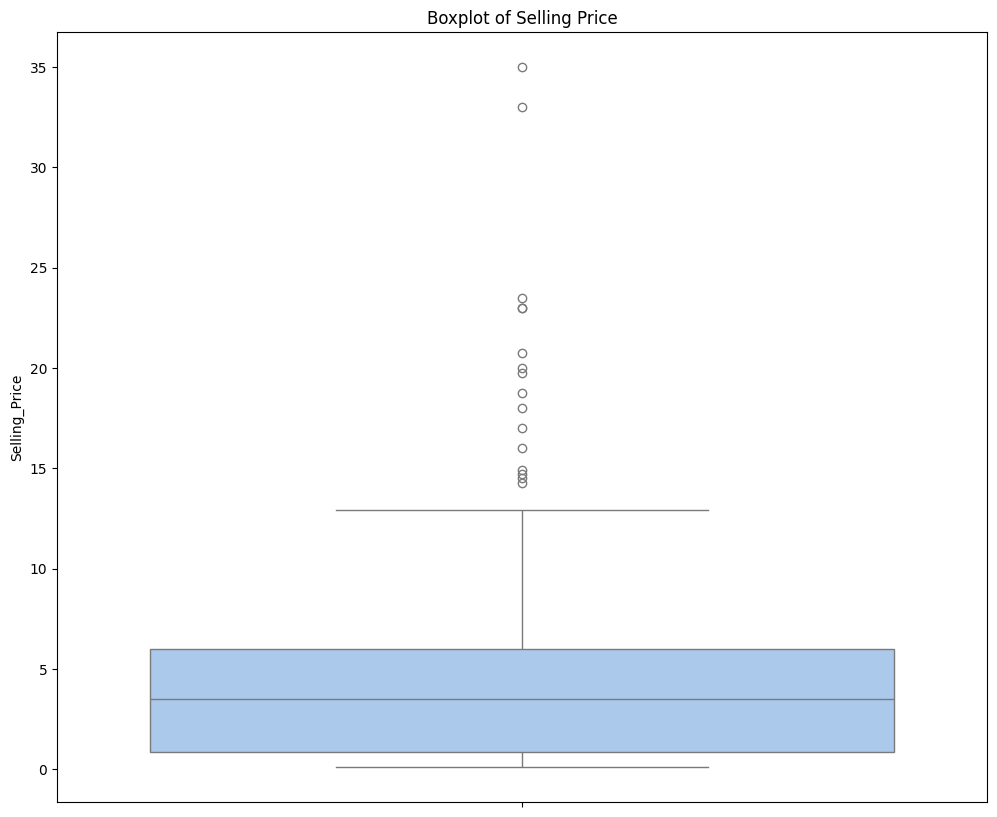

In [ ]:
plt.figure(figsize=(12, 10))
sns.boxplot(car['Selling_Price'],palette='pastel')
plt.title('Boxplot of Selling Price')
plt.show()

A correlation matrix is a table that displays the correlation coefficients between multiple variables in a dataset. It serves as a valuable tool for data analysis, providing insights into the relationships between variables. This report outlines the key reasons for using a correlation matrix and its significance in various analytical contexts.

1. **Identifying Relationships:**
The primary function of a correlation matrix is to reveal the relationships among variables. By calculating the correlation coefficients, it helps identify whether the relationships are positive, negative, or nonexistent. This insight is crucial for understanding how variables interact.

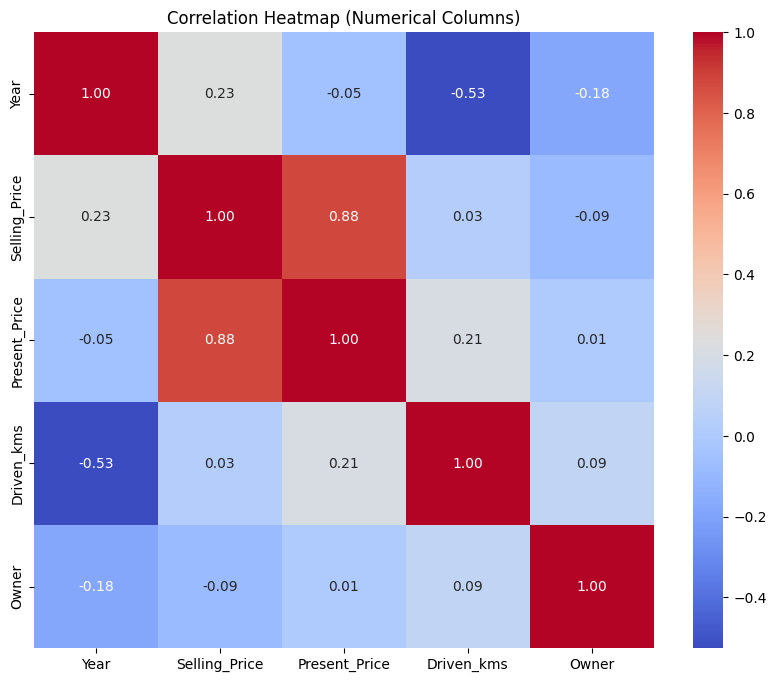

In [ ]:
# Select numerical columns
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

# Create a DataFrame containing only the numerical columns
numerical_car = car[numerical_columns]

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_car.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

We will display the box plots of each feature so that we can illustrate key statistical measures, including the minimum, first quartile (Q1), median, third quartile (Q3), and maximum.

**Key Advantages**

**Visual Clarity:** Box plots provide a clear representation of data distribution, making it easy to interpret central tendencies and variability.

**Comparison:** They facilitate easy comparisons between multiple groups, highlighting differences in medians and ranges.

**Outlier Identification:** Box plots effectively identify outliers, which can indicate variability or errors in the data.

**Summary of Distribution:** They summarize data using the interquartile range (IQR), offering insights into data spread.

**Robustness:** Box plots are suitable for datasets that do not follow a normal distribution.

<ipython-input-14-76eef15349cb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(car[i],palette='pastel')
<ipython-input-14-76eef15349cb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(car[i],palette='pastel')
<ipython-input-14-76eef15349cb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(car[i],palette='pastel')
<ipython-input-14-76eef15349cb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxpl

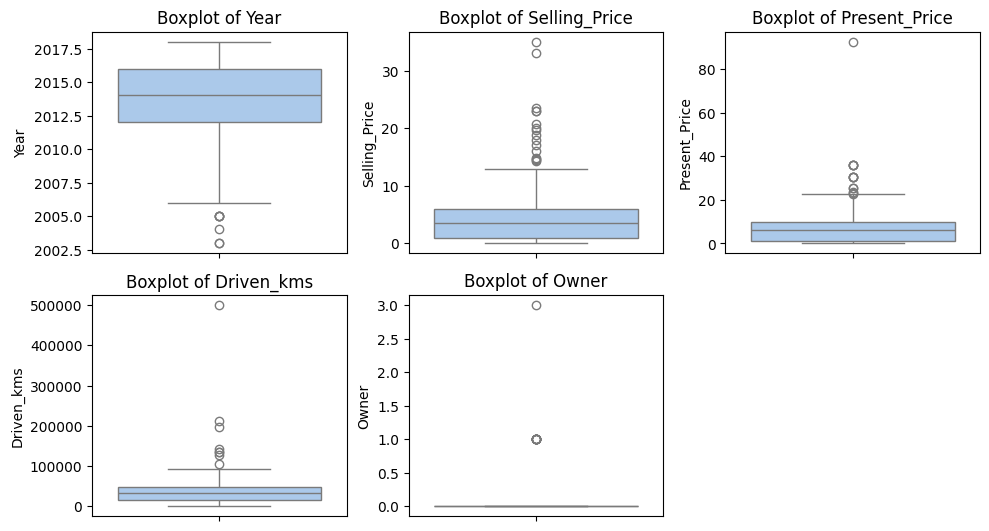

In [ ]:
plt.figure(figsize=(10, 8))
j=1
for i in numerical_columns:
  plt.subplot(3,3,j)
  sns.boxplot(car[i],palette='pastel')
  plt.title(f'Boxplot of {i}')
  j=j+1
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

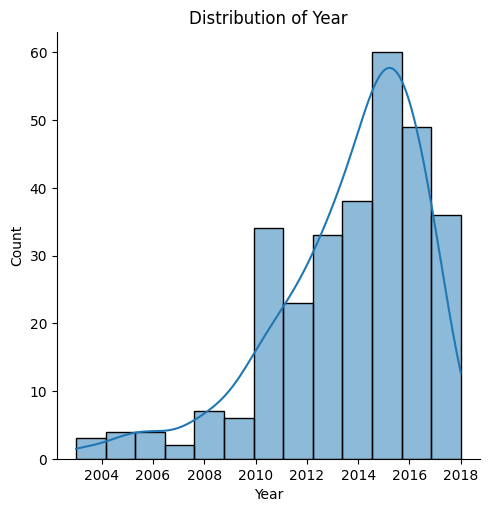

<Figure size 1000x600 with 0 Axes>

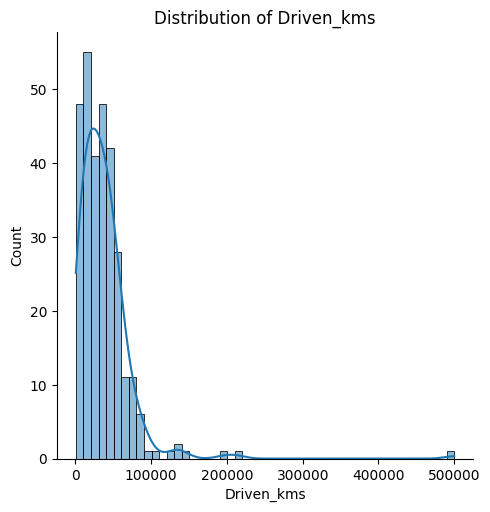

<Figure size 1000x600 with 0 Axes>

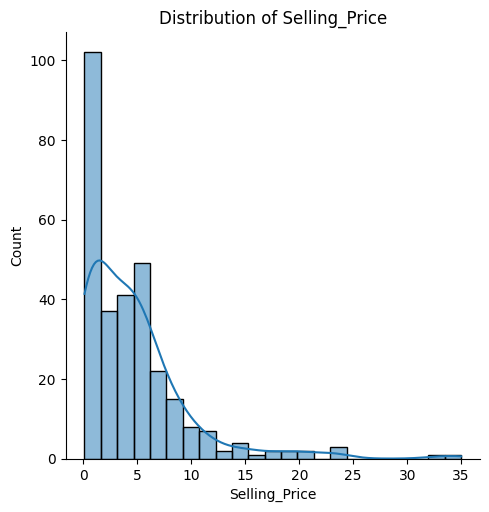

<Figure size 1000x600 with 0 Axes>

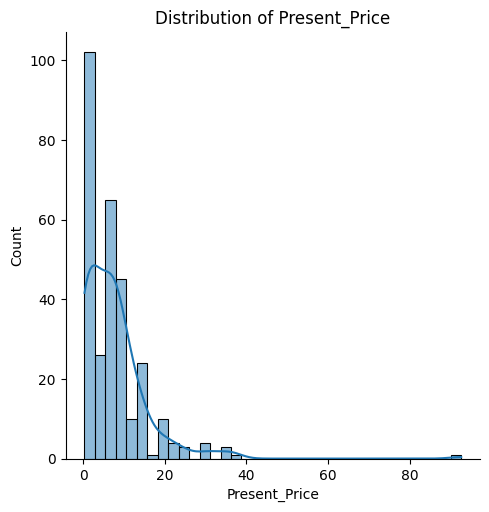

In [ ]:
numerical_features = ['Year', 'Driven_kms', 'Selling_Price', 'Present_Price']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.displot(data=car, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

<ipython-input-16-33fb0a00587b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=car, palette=colors)
<ipython-input-16-33fb0a00587b>:7: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(x=feature, data=car, palette=colors)


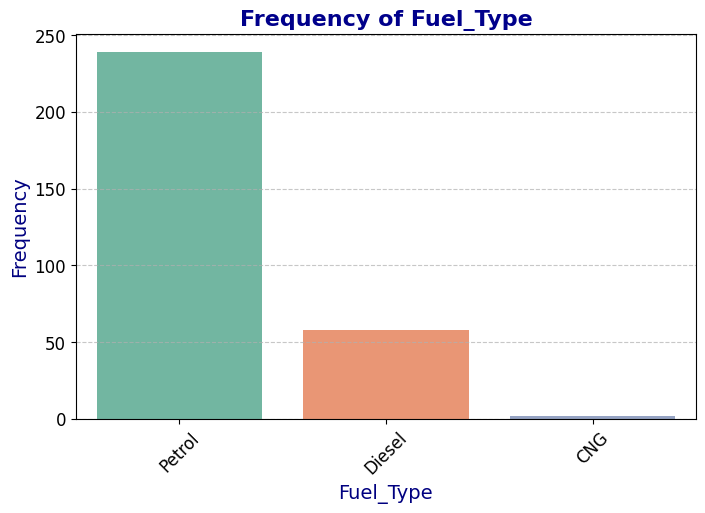

<ipython-input-16-33fb0a00587b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=car, palette=colors)
<ipython-input-16-33fb0a00587b>:7: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=car, palette=colors)


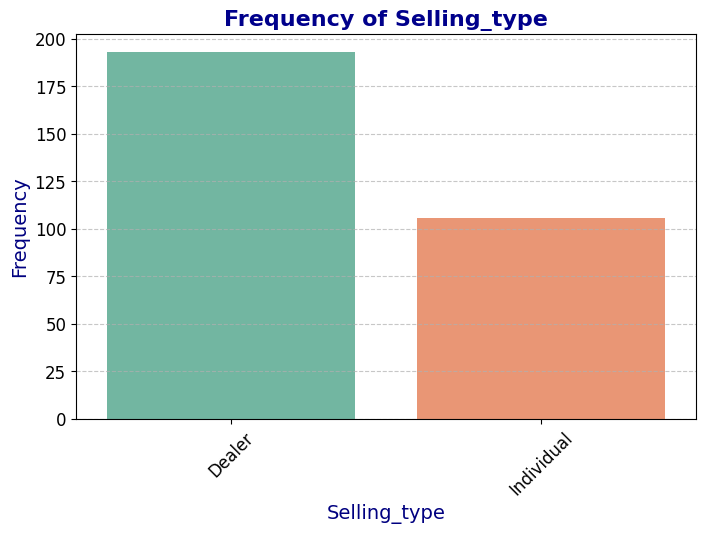

<ipython-input-16-33fb0a00587b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=car, palette=colors)
<ipython-input-16-33fb0a00587b>:7: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=car, palette=colors)


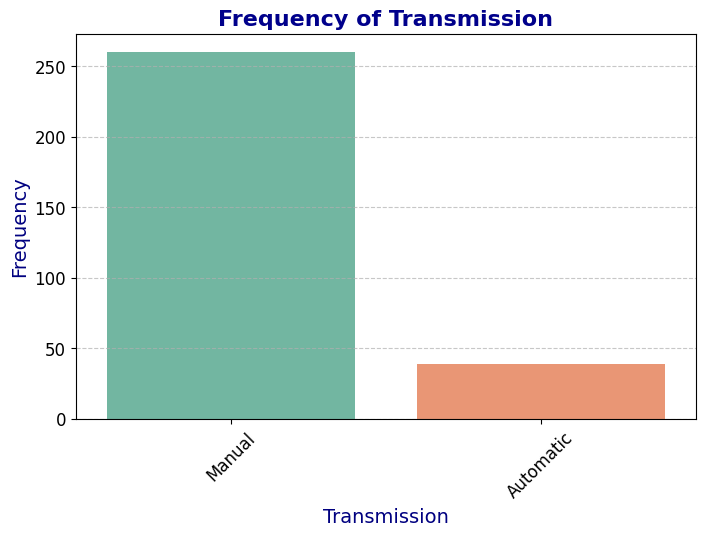

<ipython-input-16-33fb0a00587b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=car, palette=colors)
<ipython-input-16-33fb0a00587b>:7: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(x=feature, data=car, palette=colors)


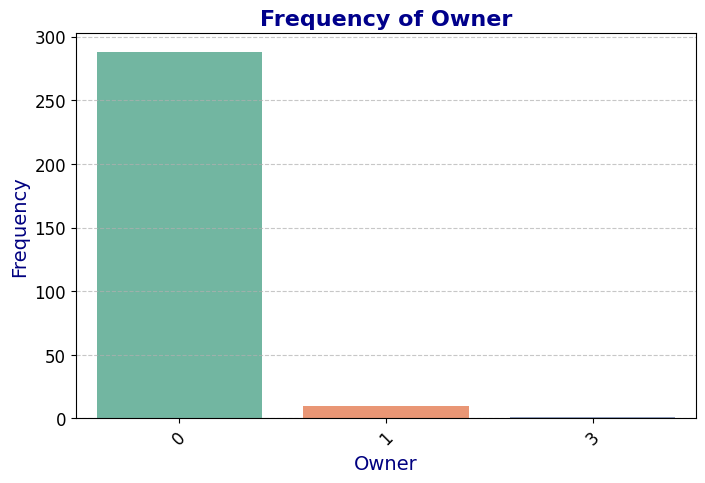

In [ ]:
 #Define a color palette for the plots
colors = sns.color_palette("Set2")
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
# Plot each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=car, palette=colors)
    plt.title(f'Frequency of {feature}', fontsize=16, color='darkblue', fontweight='bold')
    plt.xlabel(f'{feature}', fontsize=14, color='navy')
    plt.ylabel('Frequency', fontsize=14, color='navy')
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [ ]:
print(car['Fuel_Type'].value_counts())
print(car['Selling_type'].value_counts())
print(car['Transmission'].value_counts())


Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64
Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


In [ ]:
# encoding "Fuel_Type" Column
car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# encoding "Seller_Type" Column
car.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
# encoding "Transmission" Column
car.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
X = car.drop(['Car_Name','Selling_Price'],axis=1)
Y = car['Selling_Price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
# Scale the data using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
svr_model = SVR(kernel='linear')  # You can use 'rbf' or 'poly' as well
svr_model.fit(x_train_scaled, y_train)

# Make predictions
y_pred = svr_model.predict(x_test_scaled)

In [ ]:
# 1. Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 2. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# 3. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 4. R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 6.477671510407976
Root Mean Squared Error (RMSE): 2.5451270126278525
Mean Absolute Error (MAE): 1.4288376120112405
R-squared (R²): 0.7160450945972712


In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
283,8.99,7.783254,1.206746
267,8.35,6.947828,1.402172
166,0.45,1.073881,-0.623881
9,7.45,6.117994,1.332006
78,5.25,11.346033,-6.096033
...,...,...,...
128,0.80,1.429210,-0.629210
230,6.15,5.872831,0.277169
285,7.40,6.419957,0.980043
257,8.50,7.981782,0.518218


In conclusion, this predictive model has been designed to efficiently forecast car prices by leveraging key features and employing advanced machine learning techniques. It is a powerful tool for making data-backed decisions in the automotive industry, with the potential to be continuously improved and updated with more data to further enhance its accuracy and applicability.